## Observations and Insights 

In [70]:
# Final Version of Homework

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# See what datatypes we have 
mouse_metadata.info()
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results, how ="outer", on="Mouse ID")

# Display the data table for preview
combined_results_df.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.

number_mice_df = combined_results_df["Mouse ID"].unique()

len(number_mice_df)


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#1 Find out where the dupicates are

duplicate_rows_df = combined_results_df[combined_results_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Find out what the duplicates are (g989)

duplicate_rows_df10 = combined_results_df[combined_results_df["Mouse ID"] == "g989"]
duplicate_rows_df10


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#works
#duplicate_rows_df2 = combined_results_df.set_index('Mouse ID')
#duplicate_rows_df2


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_rows_df10 = combined_results_df[combined_results_df["Mouse ID"] == "g989"]
duplicate_rows_df10


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_results_df = combined_results_df[combined_results_df["Mouse ID"] != "g989"]
clean_results_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.

clean_results_df = combined_results_df[combined_results_df["Mouse ID"] != "g989"]
clean_results_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_results_df2 = clean_results_df.groupby(["Drug Regimen"])
clean_results_df2.mean()



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [13]:
clean_results_df2.median()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.5,20.5,20.0,41.557809,0.0
Ceftamin,12.0,28.0,20.0,51.776157,1.0
Infubinol,20.0,27.0,15.0,51.820584,1.0
Ketapril,18.0,28.0,20.0,53.698743,1.0
Naftisol,9.0,27.0,20.0,52.509285,1.0
Placebo,10.0,28.0,15.0,52.288934,1.0
Propriva,7.5,26.0,15.0,50.446266,1.0
Ramicane,9.0,19.0,20.0,40.673236,0.0
Stelasyn,14.0,28.0,20.0,52.431737,1.0


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


clean_results_df3 = clean_results_df2["Tumor Volume (mm3)"]
clean_results_df3.describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints = clean_results_df2["Timepoint"].count()
total_timepoints


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

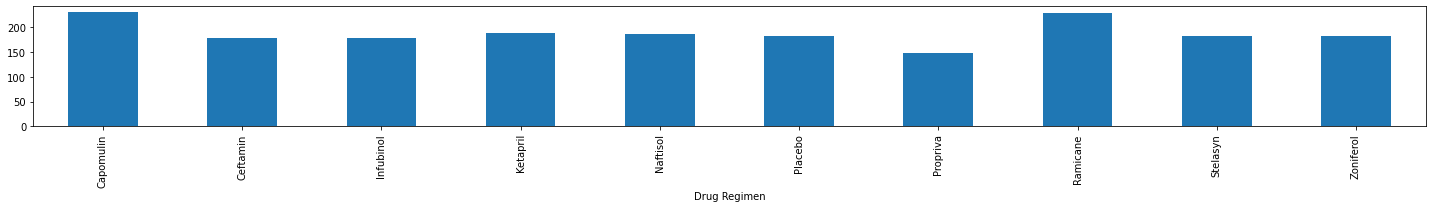

In [16]:
#total_timepoints2 = clean_results_df2["Drug Regimen","Timepoint"]
total_timepoints.plot(kind="bar", figsize=(20,3))
plt.tight_layout()

<BarContainer object of 10 artists>

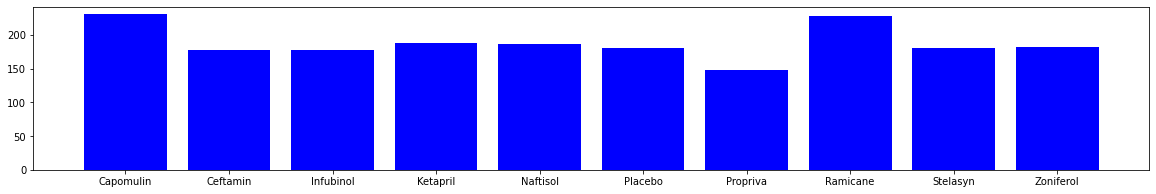

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

import numpy as np
x_axis= np.arange(len(total_timepoints))
#tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
my_xticks = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva","Ramicane", "Stelasyn", "Zoniferol"] 
plt.xticks(x_axis, my_xticks)
plt.bar(x_axis, total_timepoints, color = "b")


In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_results_df = clean_results_df.groupby(["Sex"])
gender_sum_df = gender_results_df["Sex"].count()
gender_sum_df



Sex
Female    922
Male      958
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Mice by Gender'}, ylabel='Sex'>

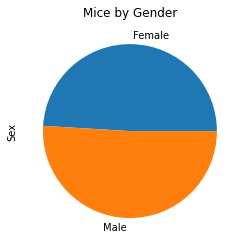

In [19]:
gender_sum_df.plot(kind="pie", title="Mice by Gender")
#gender_sum_df.set_ylabel(" ")

Text(0.5, 1.0, 'Mice by Gender')

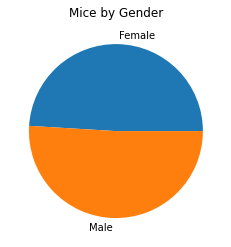

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import numpy as np

gender_results_df = clean_results_df.groupby(["Sex"])
gender_sum_df = gender_results_df["Sex"].count()
labels = ["Female", "Male"]

plt.pie(gender_sum_df, labels=labels)
plt.title("Mice by Gender")


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

top_mouse_data = clean_results_df.groupby("Mouse ID")
top_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [22]:
top_mouse_data2 = top_mouse_data["Timepoint"].max()
top_mouse_data2

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [23]:
top_mouse_data10 = pd.DataFrame(top_mouse_data2).reset_index()

In [24]:
type(top_mouse_data2)


myresults_df=clean_results_df.merge(top_mouse_data10, how="right") 

In [25]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


myresults_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [32]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

included = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_drugs_df = myresults_df[myresults_df["Drug Regimen"].isin(included)]
four_drugs_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
3,a275,Ceftamin,Female,20,28,45,62.999356,3
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes (above)
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [108]:
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,b128,Capomulin,Female,9,22,45,38.982878,2
24,b742,Capomulin,Male,7,21,45,38.939633,0
61,f966,Capomulin,Male,16,17,20,30.485985,0
64,g288,Capomulin,Male,3,19,45,37.074024,1
66,g316,Capomulin,Female,22,22,45,40.159220,2


In [113]:
# Quartiles for Capomulin

includedc = ["Capomulin"]
capomulin_df = myresults_df[myresults_df["Drug Regimen"].isin(includedc)]

quartilesc_4 = capomulin_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
quartilesc_4


0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [105]:
includedr = ["Ramicane"]
four_drugsr_df = myresults_df[myresults_df["Drug Regimen"].isin(includedr)]
four_drugsr_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0
10,a520,Ramicane,Male,13,21,45,38.810366,1
12,a644,Ramicane,Female,7,17,45,32.978522,1
33,c458,Ramicane,Female,23,20,30,38.342008,2


In [109]:
# Quartiles for Ramicane

quartilesr_4 = four_drugsr_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
quartilesr_4

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64

In [106]:
includedi = ["Infubinol"]
four_drugsi_df = myresults_df[myresults_df["Drug Regimen"].isin(includedi)]
four_drugsi_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
11,a577,Infubinol,Female,6,25,30,57.031862,2
13,a685,Infubinol,Male,8,30,45,66.083066,3
27,c139,Infubinol,Male,11,28,45,72.226731,2


In [110]:
# Quartiles for Infubinol

quartilesi_4 = four_drugsi_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
quartilesi_4

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64

In [107]:
includedce = ["Ceftamin"]
four_drugsce_df = myresults_df[myresults_df["Drug Regimen"].isin(includedce)]
four_drugsce_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
3,a275,Ceftamin,Female,20,28,45,62.999356,3
21,b447,Ceftamin,Male,2,30,0,45.000000,0
22,b487,Ceftamin,Female,6,28,25,56.057749,1
25,b759,Ceftamin,Female,12,25,30,55.742829,1
58,f436,Ceftamin,Female,3,25,15,48.722078,2


In [111]:
# Quartiles for Ceftamin

quartilesce_4 = four_drugsce_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
quartilesce_4

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. All four treatments

quartiles_4 = four_drugs_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
quartiles_4


0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64

In [37]:
#IQR

lowerq = quartiles_4[.25]
upperq = quartiles_4[.75]
iqr = upperq - lowerq
iqr

22.742517952499995

In [41]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Below This Could Be Outliers: {lower_bound}")
print(f"Above This Could Be Outliers: {upper_bound}")

Below This Could Be Outliers: 3.0739668737500097
Above This Could Be Outliers: 94.04403868374999


In [44]:
four_drugs_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [48]:
# no outliers?

four_drugs_df.loc[four_drugs_df["Tumor Volume (mm3)"] < 3]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [92]:
#highest value is around 70, so no outliers?

four_drugs_df.loc[four_drugs_df["Tumor Volume (mm3)"] > 94]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


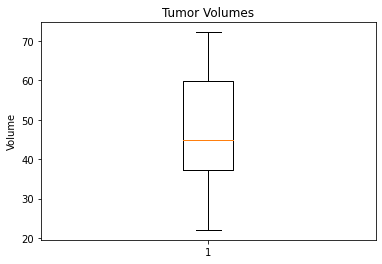

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

four_box = four_drugs_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes")
ax1.set_ylabel("Volume")
ax1.boxplot(four_box)
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Size of Tumor vs. Timepoint')

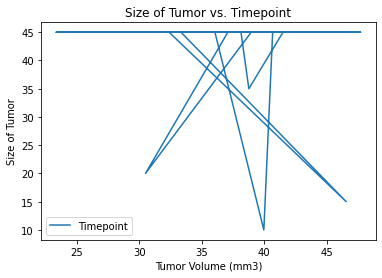

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (Capomulin break out is below)

capomulin_df.plot(x="Tumor Volume (mm3)", y = "Timepoint")
plt.ylabel("Size of Tumor")
plt.title("Size of Tumor vs. Timepoint")

# Is this correct?


In [57]:
# Break out Capomulin

includedc = ["Capomulin"]
capomulin_df = myresults_df[myresults_df["Drug Regimen"].isin(includedc)]
capomulin_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,b128,Capomulin,Female,9,22,45,38.982878,2
24,b742,Capomulin,Male,7,21,45,38.939633,0
61,f966,Capomulin,Male,16,17,20,30.485985,0
64,g288,Capomulin,Male,3,19,45,37.074024,1
66,g316,Capomulin,Female,22,22,45,40.159220,2
80,i557,Capomulin,Female,1,24,45,47.685963,1
83,i738,Capomulin,Female,23,20,45,37.311846,2
85,j119,Capomulin,Female,7,23,45,38.125164,1
87,j246,Capomulin,Female,21,21,35,38.753265,1
108,l509,Capomulin,Male,17,21,45,41.483008,3


<function matplotlib.pyplot.show(close=None, block=None)>

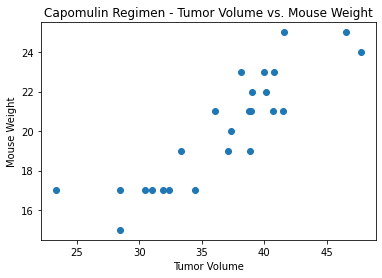

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_values = capomulin_df["Tumor Volume (mm3)"]
y_values = capomulin_df["Weight (g)"]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #
#regress_values = x_values * slope + intercept #
#line_eq = "y = " +str(round(slope,2)) + "x +" + str(round(intercept,2)) #
plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-") #

plt.title("Capomulin Regimen - Tumor Volume vs. Mouse Weight")
plt.xlabel("Tumor Volume")
plt.ylabel("Mouse Weight")
plt.show




## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"Correlation Coefficient Between Mouse Weight and Average Tumor Volume for the Capomulin Regiment is: {round(st.pearsonr(x_values, y_values)[0],2)}")


Correlation Coefficient Between Mouse Weight and Average Tumor Volume for the Capomulin Regiment is: 0.88


In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

    
mw_slope, mw_int, mw_r, mw_p, mw_std_err = st.linregress(x_values, y_values)
print(f'slope = {mw_slope}')
print(f'intercept = {mw_int}')




slope = 0.4390902208326348
intercept = 4.0196295927808805


In [98]:
mw_fit = mw_slope * x_values + mw_int


<function matplotlib.pyplot.show(close=None, block=None)>

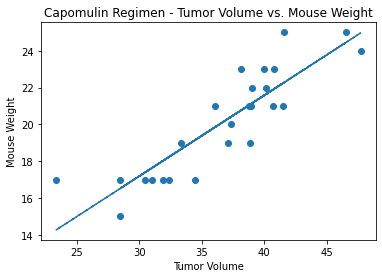

In [99]:
x_values = capomulin_df["Tumor Volume (mm3)"]
y_values = capomulin_df["Weight (g)"]
plt.scatter(x_values, y_values)
plt.plot(x_values, mw_fit, "--")

plt.title("Capomulin Regimen - Tumor Volume vs. Mouse Weight")
plt.xlabel("Tumor Volume")
plt.ylabel("Mouse Weight")
plt.show